# Data Analysis of U.S. Hate Crime in 2019


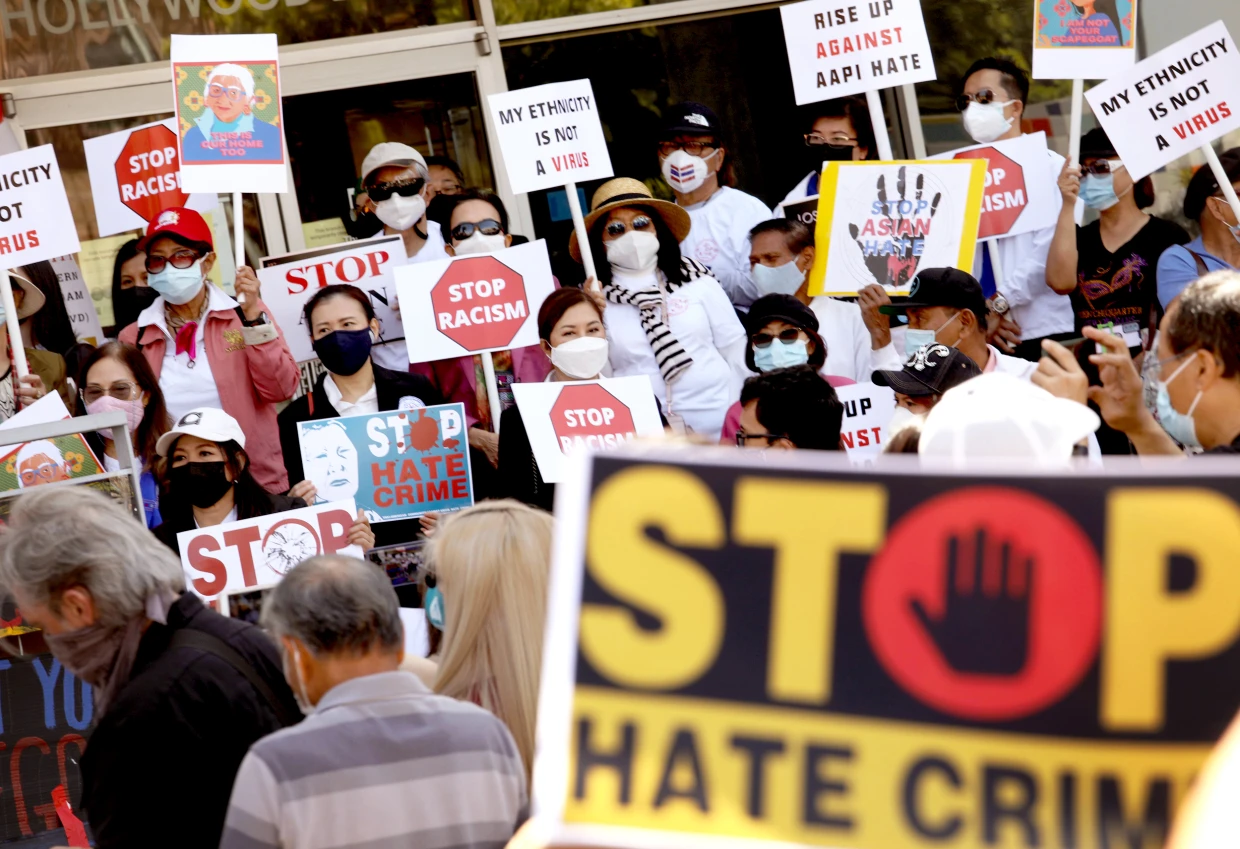

#**General Outline**

Our analysis will follow the outline below: 

1. **Executive Summary:** definition of our dataset, its origin, and goals of the analysis
2.  **Dataset processing:** where we apply concepts from the IS833 to clean dataset, replace null variables, aggregating data, and remove unrelated information. 
3. **Analysis:** where we illustrate the processed dataset in different types of charts and graphs to get insights and answers for our goals/ questions. We group our analysis into three buckets: State-wise, Bias-wise, and Others.
4. **Conclusion:** summarize our findings and providing recommendations.

# **1. Executive Summary**

## **1.1 Problem Definition and Goals**
According to the American Psychological Association (APA), a hate crime is defined as a “criminal offense against a person or property motivated in whole or in part by an offender's bias against a race, religion, disability, sexual orientation, ethnicity, gender or gender identity." 


With the recent social movements seeking to highlight and condemn this extreme form of prejudice (e.g. Black Lives Matter, LGBTQA+, #MeToo) our group analyzed which areas in the US have high hate crime rates using 2019 data provided by each state’s public record (compiled via Creative Commons). This will allow authorities to identify states with higher rates of hate crimes to better allocate resources accordingly in an effort to fight hate crimes.

Throughout our analysis, we sought to find answers to the following questions:
1. Which state and which city has the highest number of hate crimes and why?
2. Is there a correlation between the political climate of the state, its history, and its prevalent bias motivations?
3. Is there a correlation between two bias motivations?
4. Is there a correlation between a bias motivation and the quarter in which a crime occured?

## **1.2 Dataset**
The dataset we've chosen for this project has 2172 rows of hate crime incidents with 17 columns of two groups of data:

**Group 1: Geographic and Demographic information**
* **State** - A constituent political entity. (e.g. Alaska, California)
* **Agency Type** - An area in which the hate crime occured (e.g. Cities, Universities, State Police Agencies)
* **Agency** - The name of the area in which the hate crime occured (e.g. New York, Boston University, LAPD)
* **Population** - The total number of people in a city, county, or any agency.
* **State_Lat** & **State_Long** - The laditute and longitude of a state
* **1st Quarter** to **4th Quarter** - Total number of hate crime that occured in each quarter
* **Annual Crime** - Total number of hate crimes occured in a particular area in 2019

**Group 2: Types of Hate Crime**
* **Race/Ethnicity/Ancestry** - Acategory of humankind that shares certain distinctive physical traits, cultural expression and identification (e.g. Asian, Hispanic)
* **Religion** - The belief in and worship of a superhuman controlling power, especially a personal God or gods (e.g. Christianity, Judaism, Islam).
* **Sexual Orientation** - An enduring pattern of romantic or sexual attraction (or a combination of these) to persons of the opposite sex or gender, the same sex or gender, or to both sexes or more than one gender (e.g. straight, gay, bisexual, pansexual).
* **Disability** - A physical or mental condition that limits a person's movements, senses, or activities (e.g. visual impairement, mental health conditions)
* **Gender** - The range of characteristics pertaining to femininity and masculinity and differentiating between them.
* **Gender Identity** - A personal sense one's own gender. Gender identity can correlate with a person's assigned sex or can differ (e.g. cisgender, transgender, gender fluid, nonbinary)

The dataset we have referenced is also federal hate crime data - incidents that occured in U.S. Government agencies.

# **2. Data Processing**

## 2.2.1 Scope and Limitations
The group would like to acknowledge that the dataset will only be focusing on 2019 data, as this is the most updated hate crime data available. 

There are a couple of limitations that the group would like to point out in this project: 

* Alabama did not submit any hate crime data in 2019; so there is no visibility for this state.
* Hate crime recorded includes incidents of both single-bias and multiple-bias, and the dataset does not distinguish the two;
* Some agencies failed to report any incidents, and for the purposes of this project we have replaced all null incidents data to 0.

## 2.2.2 Loading the Dataset and Libraries
For the purposes of this project we have used this dataset from [Kaggle.](https://www.kaggle.com/datasets/sumaiaparveenshupti/us-hate-crime-dataset-20102019-multiple-sources?select=Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_Federal_and_Agency_2019.csv). The original link to this dataset can be found at the [Bureau of Justice Statistics website](https://bjs.ojp.gov/library/publications/hate-crime-recorded-law-enforcement-2010-2019).

We will be using the Hate Crime Incidents Per Bias Motivation and Quarter dataset specifically.


In [ ]:
# Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
from contextlib import contextmanager
from time import time
from tqdm import tqdm
from IPython.display import Pretty as disp
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from IPython.display import Pretty as disp
hint = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/docs/hints/'  # path to hints on GitHub
import matplotlib.pyplot as plt
#plt.style.use('classic')
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hc = pd.read_csv('https://raw.githubusercontent.com/tiensae/is833/main/FINAL_Hate_Crime_Incidents.csv')

In [ ]:
#Understanding the categories of the dataset
hc.head()

,State,Agency Type,Agency,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nidentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Annual Hate crime,Population,State_Lat,State_Long
0,Alaska,Cities,Anchorage,4.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,6,287731.0,63.58875,-154.493062
1,Alaska,Cities,Fairbanks,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,31493.0,63.58875,-154.493062
2,Alaska,Cities,Kotzebue,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3272.0,63.58875,-154.493062
3,Alaska,Cities,North Pole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1,2111.0,63.58875,-154.493062
4,Alaska,Cities,Soldotna,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2,4756.0,63.58875,-154.493062


In [ ]:
hc.describe()

,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nidentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Annual Hate crime,Population,State_Lat,State_Long
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2102.000000,2126.000000,2102.000000,2086.000000,2173.000000,2.173000e+03,2125.000000,2125.000000
mean,1.907459,0.755064,0.585175,0.074586,0.035451,0.097606,0.756422,0.904986,0.938630,0.875839,3.365854,6.592391e+04,39.207092,-90.944940
std,6.963695,6.166345,3.295883,0.365432,0.241169,0.844225,3.596847,4.030169,4.162403,3.848874,14.857955,2.467508e+05,5.149656,16.123734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.140000e+02,9.045755,-155.665857
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.340500e+04,36.778261,-99.901813
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.439300e+04,40.058324,-85.602364
75%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.585800e+04,43.299428,-78.656894
max,178.000000,266.000000,80.000000,6.000000,4.000000,27.000000,115.000000,97.000000,98.000000,117.000000,423.000000,8.379043e+06,63.588750,-69.445469


## 2.2.3 Preprocessing the Data 
Before we begin aggregating and performing our analysis, we want to ensure that null data for all 6 categories and for all 4 quarters are filled. 

We've made three dataframes:

- **hc** will serve as our base dataframe.
- **hc_nonull** is the dataframe with type of crimes, eliminating state coordinates.
- **hc_clean** will be all crimes without quarterly information.

In [ ]:
#check which columns are null
hc.isnull().sum()

State                           0
Agency Type                     0
Agency                          0
Race/\nEthnicity/\nAncestry     1
Religion                        1
Sexual\norientation             1
Disability                      1
Gender                          1
Gender\nidentity                1
1st\nquarter                   71
2nd\nquarter                   47
3rd\nquarter                   71
4th\nquarter                   87
Annual Hate crime               0
Population                      0
State_Lat                      48
State_Long                     48
dtype: int64

In [ ]:
#Fill all categories and quarters with 0 then run
hc["Race/\nEthnicity/\nAncestry"].fillna(0, inplace=True)
hc["Religion"].fillna(0, inplace=True)
hc["Sexual\norientation"].fillna(0, inplace=True)
hc["Disability"].fillna(0, inplace=True)
hc["Gender"].fillna(0, inplace=True)
hc["Gender\nidentity"].fillna(0, inplace=True)
hc["1st\nquarter"].fillna(0, inplace=True)
hc["2nd\nquarter"].fillna(0, inplace=True)
hc["3rd\nquarter"].fillna(0, inplace=True)
hc["4th\nquarter"].fillna(0, inplace=True)
hc.isnull().sum()

State                           0
Agency Type                     0
Agency                          0
Race/\nEthnicity/\nAncestry     0
Religion                        0
Sexual\norientation             0
Disability                      0
Gender                          0
Gender\nidentity                0
1st\nquarter                    0
2nd\nquarter                    0
3rd\nquarter                    0
4th\nquarter                    0
Annual Hate crime               0
Population                      0
State_Lat                      48
State_Long                     48
dtype: int64

We recognized that there were 48 entries that did not have State_long and State_lat data. Upon checking the original dataset, we realized these entries were hate crime recorded in FBI offices.

We'll be using these later on, but for now we'll be dropping State_Lat and State_Long to eliminate null values.

In [ ]:
#Using hc_nonull to eliminate null values
hc_nonull = hc.drop(columns=["State_Lat","State_Long"])
hc_nonull

,State,Agency Type,Agency,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nidentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Annual Hate crime,Population
0,Alaska,Cities,Anchorage,4.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,6,287731.0
1,Alaska,Cities,Fairbanks,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,31493.0
2,Alaska,Cities,Kotzebue,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3272.0
3,Alaska,Cities,North Pole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2111.0
4,Alaska,Cities,Soldotna,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2,4756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,Federal,Federal Agencies,"FBI Field Offices: Tampa, FL",1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2,98063.7
2169,Federal,Federal Agencies,"FBI Field Offices: Washington, DC",1.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,6,98063.7
2170,Federal,Federal Agencies,Pentagon Force Protection Agency,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,98063.7
2171,Federal,Federal Agencies,U.S. Navy Law Enforcement,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4,98063.7


In [ ]:
#hc_clean shows values without quarter data
hc_clean = hc_nonull.drop(columns=["1st\nquarter","2nd\nquarter","3rd\nquarter","4th\nquarter"])
hc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      2173 non-null   object 
 1   Agency Type                2173 non-null   object 
 2   Agency                     2173 non-null   object 
 3   Race/
Ethnicity/
Ancestry  2173 non-null   float64
 4   Religion                   2173 non-null   float64
 5   Sexual
orientation         2173 non-null   float64
 6   Disability                 2173 non-null   float64
 7   Gender                     2173 non-null   float64
 8   Gender
identity            2173 non-null   float64
 9   Annual Hate crime          2173 non-null   int64  
 10  Population                 2173 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 186.9+ KB


## **2.2.4 Aggregating the Data**

In [ ]:
#Grouping the data by sum
hc_state=hc_clean.groupby('State').sum()

In [ ]:
#Understanding the columns
hc_state.columns

Index(['Race/\nEthnicity/\nAncestry', 'Religion', 'Sexual\norientation',
       'Disability', 'Gender', 'Gender\nidentity', 'Annual Hate crime',
       'Population'],
      dtype='object')

In [ ]:
hc_state.shape

(51, 8)

In [ ]:
hc_state1 = hc_state.drop(columns=["Population"])

##**2.2.5 Correlation Matrix**

A correlation matrix is a common tool used to compare the coefficients of correlation between different features (or attributes) in a dataset. It allows us to visualize how much (or how little) correlation exists between different variables. This is an important step in pre-processing machine learning pipelines.

In the matrix below, we see that there is a strong correlation between 'Sexual Orientation' and 'Race/Ethnicity/Ancestry' as well as 'Gender Identity.'

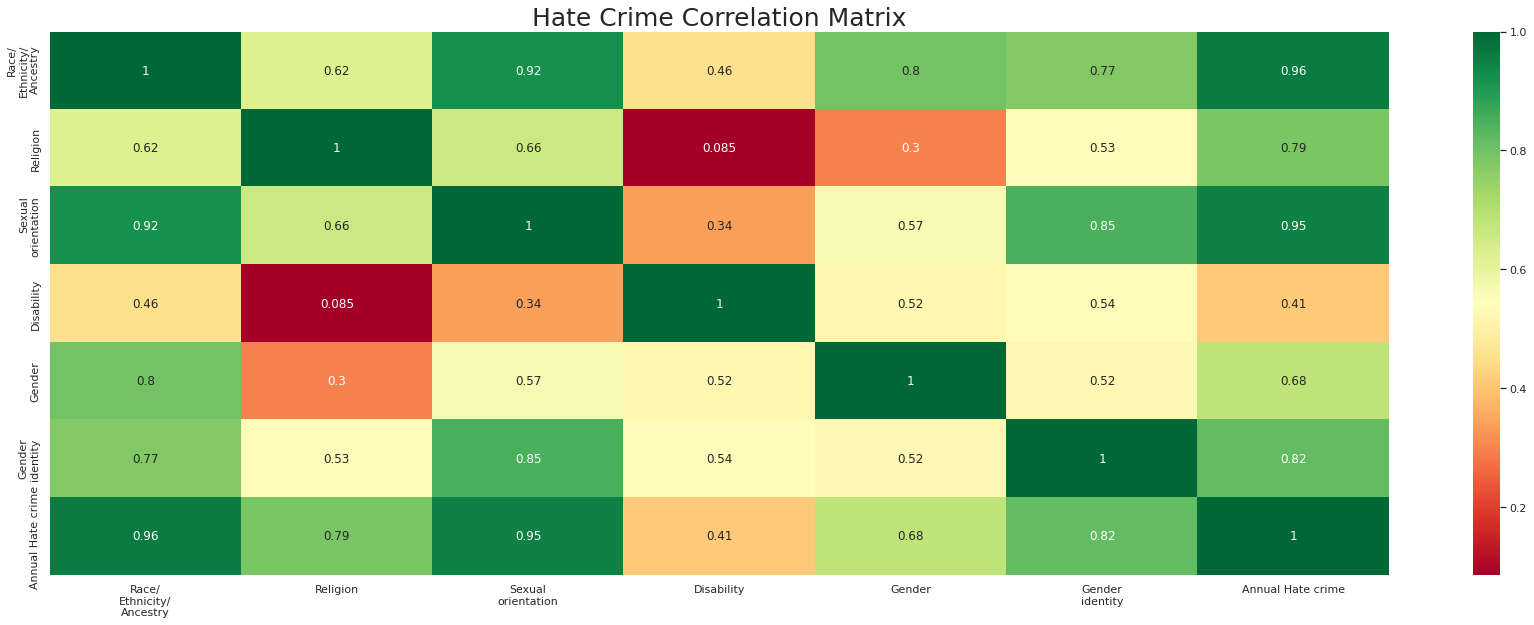

In [ ]:
plt.figure(figsize=(30,10))
corr = hc_state1.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.title('Hate Crime Correlation Matrix', fontsize=25)
plt.show()

# **3. Analysis**

## **3.1. Breakdown Per State**

To begin our analysis, we made additional aggregations of our original dataframes by annual hate crime and population. 

In [ ]:
hc_annual = hc_clean.drop(columns=['Agency Type', 'Agency', 'Race/\nEthnicity/\nAncestry','Religion', 'Sexual\norientation', 'Disability', 'Gender', 'Gender\nidentity'])
hc_annual

,State,Annual Hate crime,Population
0,Alaska,6,287731.0
1,Alaska,1,31493.0
2,Alaska,1,3272.0
3,Alaska,1,2111.0
4,Alaska,2,4756.0
...,...,...,...
2168,Federal,2,98063.7
2169,Federal,6,98063.7
2170,Federal,1,98063.7
2171,Federal,4,98063.7


Next, we aggregated the data above at a state level by sum.

In [ ]:
hc_state_annual=hc_annual.groupby('State').sum()
hc_state_annual

,Annual Hate crime,Population
State,,
Alaska,11,329363.0
Arizona,209,4255437.0
Arkansas,9,320908.0
California,1015,25276723.0
Colorado,210,3662681.0
Connecticut,76,1682593.0
Delaware,22,194751.0
District of Columbia,222,1411498.0
Federal,124,4707057.6


In [ ]:
#resetting state from index to column 
hc_state_annual = hc_state_annual.reset_index()

Then we sorted the data by hate crime in descending order and created a new dataframe titled **hc_state_annual_sort**.

In [ ]:
#State-wise Hate Crime by Annual Crimes
hc_state_annual_sort = hc_state_annual.sort_values(by=['Annual Hate crime'], ascending=False)
hc_state_annual_sort

,State,Annual Hate crime,Population
3,California,1015,25276723.0
32,New York,611,11321207.5
47,Washington,542,4178112.0
30,New Jersey,472,6005089.0
43,Texas,456,14695178.5
22,Michigan,434,5463801.0
35,Ohio,391,4680482.0
21,Massachusetts,388,3539052.0
7,District of Columbia,222,1411498.0
4,Colorado,210,3662681.0


Though we accounted for most states in this dataset, the below bar chart shows the annual hate crime by state. 
**It's worth noting that the data is not yet normalized for population yet, but will be shown later.**

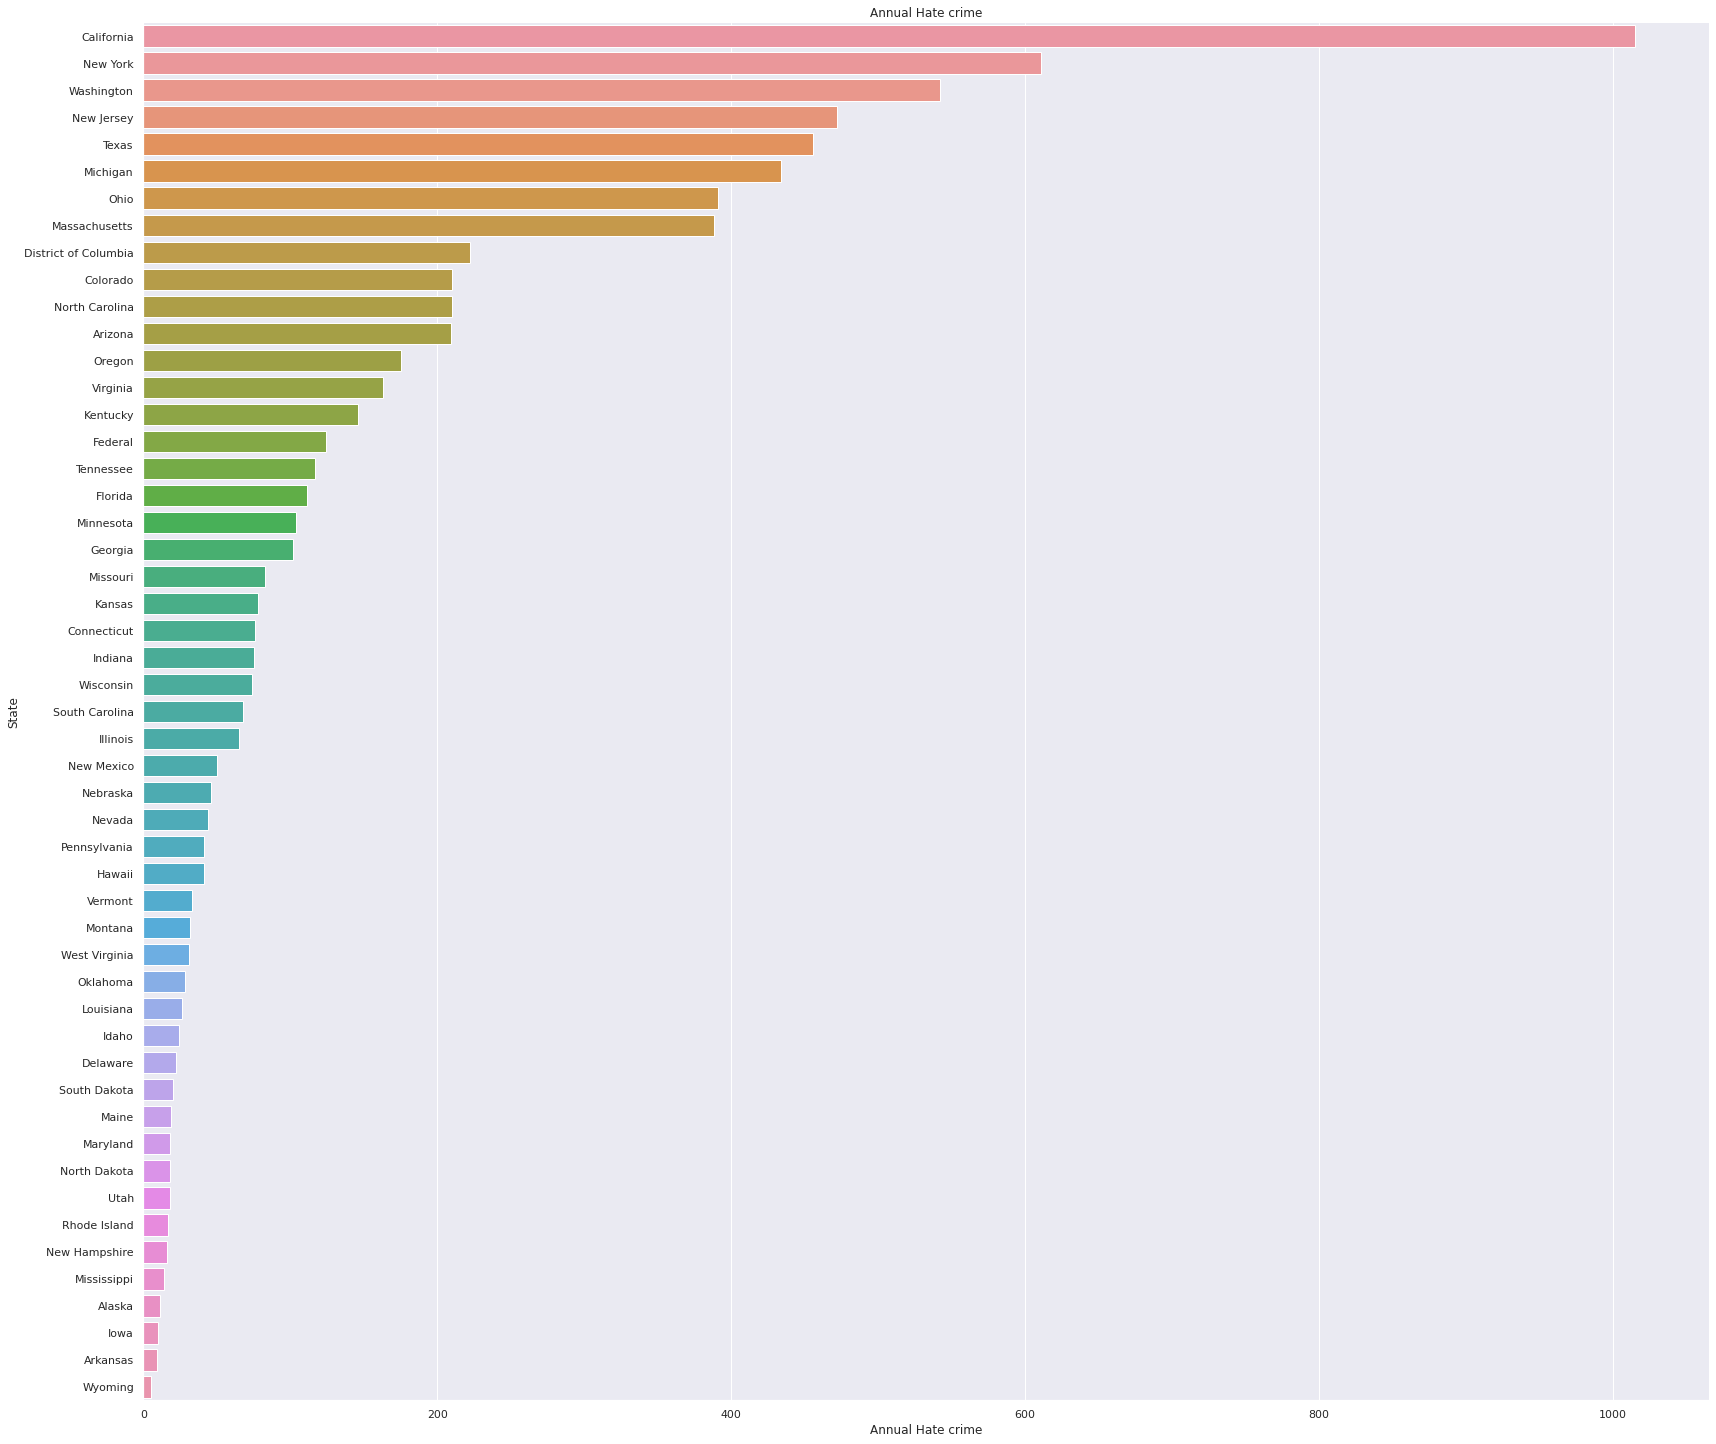

In [ ]:
sns.catplot(x="Annual Hate crime", y="State", kind="bar", data = hc_state_annual_sort, height = 20, aspect = 12/10)
plt.title('Annual Hate crime');

The dataframe below titled **hc_state_annual_top5** shows the top 5 states according to annual hate crimes.


In [ ]:
#Sorting top 5 States for Hate Crime by Annual Crimes
hc_state_annual_top5 = hc_state_annual.sort_values(by=['Annual Hate crime'], ascending=False).head(n=5)
hc_state_annual_top5

,State,Annual Hate crime,Population
3,California,1015,25276723.0
32,New York,611,11321207.5
47,Washington,542,4178112.0
30,New Jersey,472,6005089.0
43,Texas,456,14695178.5


For the top 5 states according to annual hate crimes, we've provided the chart below as a visualization. 

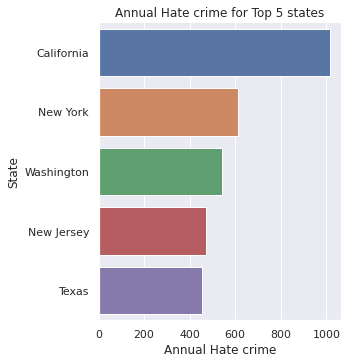

In [ ]:
sns.catplot(x="Annual Hate crime", y="State", kind="bar", data=hc_state_annual_top5);
plt.title('Annual Hate crime for Top 5 states');

Below, we tried to identify which 5 states had the hieghest total number of incidents per quarter.  

**Quarter 1**

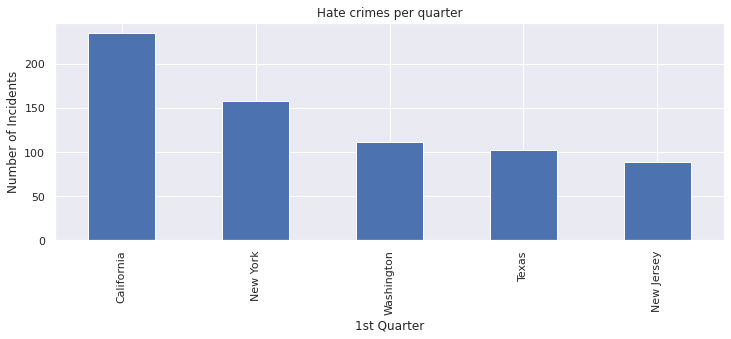

In [ ]:
incident_number_quarter = hc.groupby(by=["State"])["1st\nquarter"].sum()
incident_number_quarter.sort_values(ascending=False)[:5].plot(kind='bar', title='Hate crimes per quarter', ylabel='Number of Incidents', xlabel='1st Quarter', figsize=(12, 4))

**Quarter 2**

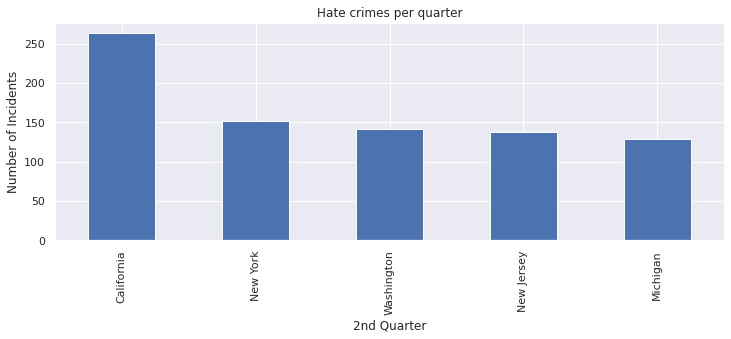

In [ ]:
incident_number_quarter = hc.groupby(by=["State"])["2nd\nquarter"].sum()
incident_number_quarter.sort_values(ascending=False)[:5].plot(kind='bar', title='Hate crimes per quarter', ylabel='Number of Incidents', xlabel='2nd Quarter', figsize=(12, 4))

**Quarter 3**

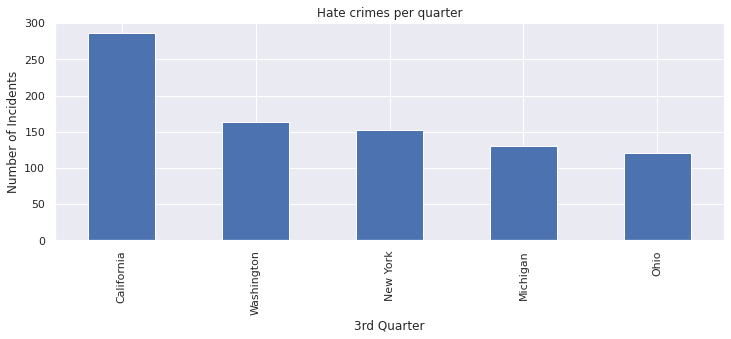

In [ ]:
incident_number_quarter = hc.groupby(by=["State"])["3rd\nquarter"].sum()
incident_number_quarter.sort_values(ascending=False)[:5].plot(kind='bar', title='Hate crimes per quarter', ylabel='Number of Incidents', xlabel='3rd Quarter', figsize=(12, 4))

**Quarter 4**

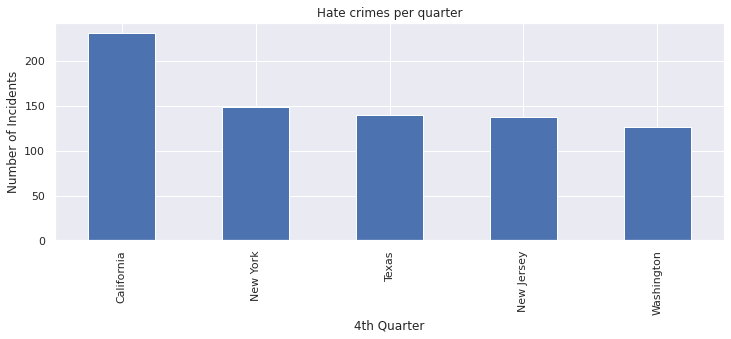

In [ ]:
incident_number_quarter = hc.groupby(by=["State"])["4th\nquarter"].sum()
incident_number_quarter.sort_values(ascending=False)[:5].plot(kind='bar', title='Hate crimes per quarter', ylabel='Number of Incidents', xlabel='4th Quarter', figsize=(12, 4))

From the above bar graphs, we can see that California has the highest number of hate crimes in every quarter, whereas the state with the 5th highest hate crime differs for different quarters.

The dataframe below, **hc_state_annual_bottom5**, shows the 5 states with the least annual hate crimes.

In [ ]:
#Sorting bottom 5 States for Hate Crime by Annual Crimes
hc_state_annual_bottom5 = hc_state_annual.sort_values(by=['Annual Hate crime'], ascending=False).tail(n=5)
hc_state_annual_bottom5

,State,Annual Hate crime,Population
24,Mississippi,14,73372.5
0,Alaska,11,329363.0
15,Iowa,10,512467.0
2,Arkansas,9,320908.0
50,Wyoming,5,86016.0


The visualization below shows the bottom 5 states according to annual hate crimes. You can see that these states generally have a lower populations compared to the top 5 states. 

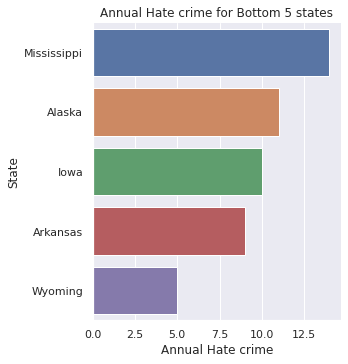

In [ ]:
sns.catplot(x="Annual Hate crime", y="State", kind="bar", data = hc_state_annual_bottom5);
plt.title('Annual Hate crime for Bottom 5 states');

**Which states have the highest number of hate crimes?** 
Looking at the total number of hate crime incidents, California seems to top all of the states with 1015 incidents and Wyoming has only 5 incidents in the year 2019. 
However, these absolute numbers do not give a real picture. We need to study the incidents relative to the population of respective states to get the actual sense of hate crimes in each state.

### **3.1.1 Analysis of Hate Crime - Top 5 States (by hate crime type)**

In [ ]:
#resetting state from index to column 
data_state3 = hc_state.reset_index()

####**3.1.2.1 Visualization of Hate Crime by Sexual Orientation for the top 5 States in US**

First we sorted the data by category, starting with 'Sexual Orientation' and took the top 5 states and put it in a new dataframe titled **data_top_5_states_sexual_orientation**. 

In [ ]:
data_top_5_states_sexual_orientation=data_state3.sort_values(by=['Sexual\norientation'], ascending=False).head(n=5)

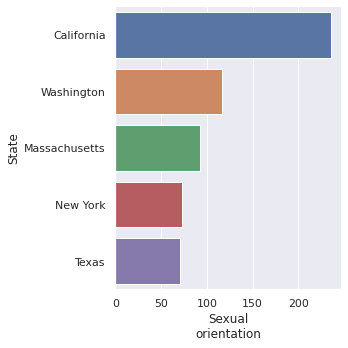

In [ ]:
sns.catplot(x="Sexual\norientation", y="State", kind="bar", data=data_top_5_states_sexual_orientation);

The above chart shows the top 5 states with the highest hate crime by **Sexual Orientation** where **California** has the highest annual hate crime, and **Texas** has the lowest annual hate crime.  

According to the exhibit above, it can be concluded that Mississippi has the highest incidences of hate crimes for every million residents. Wyoming, which had the lowest number of hate crimes in our previous graph, was in fact leading California (a state with the highest number of hate crimes) in respect of hate crimes for every million residents. 

####**3.1.2.2 Visualization of Hate Crime by Disability for the top 5 States in US**

We sorted the data by hate crime for 'Disability' and filtered out the top 5 states and created a new dataframe titled **data_top5_states_disability**.

In [ ]:
#Sorting top 5 States for Hate Crime by Disability and putting the sorted values into a dataframe
data_top_5_states_Disability=data_state3.sort_values(by=['Disability'], ascending=False).head(n=5)

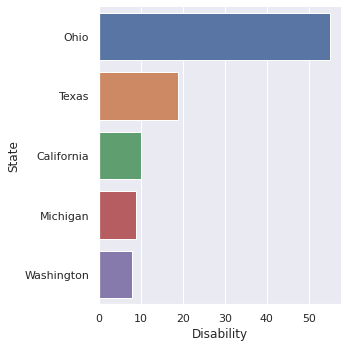

In [ ]:
sns.catplot(x="Disability", y="State", kind="bar", data=data_top_5_states_Disability);

The above chart shows that **Ohio** has the **highest** annual hate crime by 'Disability' and **Washington** has the **lowest** annual hate crime. 

Between 2018 and 2029, the hate crimes that Ohio reported to the FBI increased by 41.5%, according to Ohio's Incident-Based Reporting System. Though it was difficult to identify exactly why disability targeted hate crimes were high, Ohio specifically has less comprehensive hate crime reporting compared to other US states. 

Source: The Center Square (https://www.thecentersquare.com/ohio/this-is-how-common-hate-crimes-are-in-ohio-compared-to-other-states/article_2b4ff05a-25bf-57ed-a4c7-31ed3c324002.html) and Ohio Incident-Based Reporting System (https://www.ocjs.ohio.gov/crime_stats_reports.stm#gsc.tab=0).

####**3.1.2.3 Visualization of Hate Crime by Gender for the top 5 States in US**

In [ ]:
# Sorting the Data by Gender and filtering out the top 5 states
data_top_5_states_Gender=data_state3.sort_values(by=['Gender'], ascending=False).head(n=5)

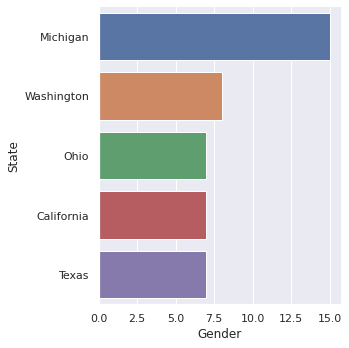

In [ ]:
sns.catplot(x="Gender", y="State", kind="bar", data=data_top_5_states_Gender);

The above chart shows that **Michigan** has the **highest** annual hate crime by 'Gender' and **Texas** has the **lowest** annual hate crime of the top 5 states. 

When compared to to other states in the top 5, Michigan had 2x more incidents then the next state, Washington.

According to supplemental research, we found that there has been a large political push to move a more comprehensive hate crime bill through their legislature that would protect transgender individuals - being targeted the most in this category -  in addition to cisgender constituents. 

Source: Michigan Public Radio (https://www.michiganradio.org/news/2019-10-21/bill-would-extend-hate-crime-penalties-to-attacks-based-on-sexual-orientation-gender-identity)

### **3.2.2 Total Hate crime incidents per million residents**
While California is the state with the highest total number of hate crime incidents, it is also one of the most populous states in the U.S.; therefore the rate at which hate crimes occur may be much smaller due to its population size.

With that being said, we wanted to do a proportion: **For every million residents, which state has the highest number of hate crimes?**

In [ ]:
hc_annual_groupby = hc_annual.groupby(["State"])[["Annual Hate crime","Population"]].sum()
hc_annual_groupby

,Annual Hate crime,Population
State,,
Alaska,11,329363.0
Arizona,209,4255437.0
Arkansas,9,320908.0
California,1015,25276723.0
Colorado,210,3662681.0
Connecticut,76,1682593.0
Delaware,22,194751.0
District of Columbia,222,1411498.0
Federal,124,4707057.6


In order to account for population per state, we divided each state's population by 1 million to measure annual hate crimes **proportionally**. 

In [ ]:
hc_per_million = hc_annual_groupby['Annual Hate crime'] / hc_annual_groupby['Population']*10**6
hc_per_million_sort = hc_per_million.sort_values(ascending=False)[:5]
hc_per_million_sort

State
Mississippi             190.807183
Vermont                 167.841558
District of Columbia    157.279713
Washington              129.723665
South Carolina          116.133109
dtype: float64

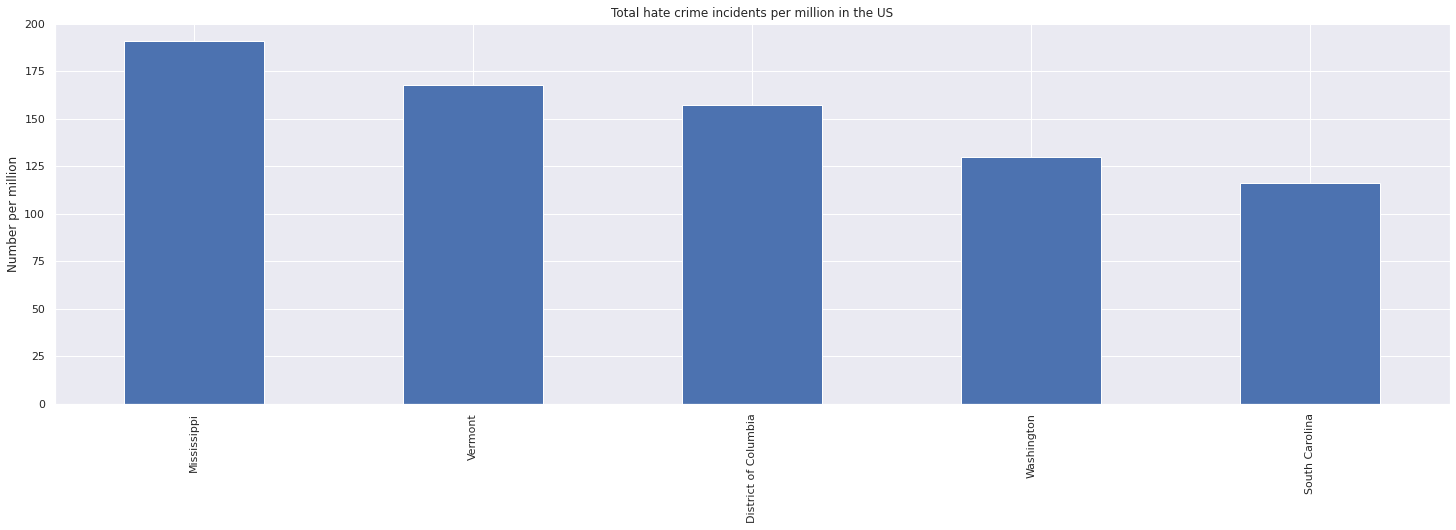

In [ ]:
hc_per_million_sort.plot(kind='bar', title='Total hate crime incidents per million in the US', ylabel='Number per million', xlabel='', figsize=(25,7));

Now you can see that the top 5 states according to annual hate crime has changed after accounting for population. 

Previously, California had the most incidents in every category, but also the highest population. Once we were able to account for population, we see that Mississippi has the highest total hate crime incidents per million people.

## **3.2 Agency Type**
Looking closely into the dataset, we want to know where exactly do these hate crimes occur within the state - which city has the highest hate crime incidents? What other agencies do we see hate crime occuring?

In this secion we identify certain areas as Agency Type, and the dataset gives the following categories:

*   **Cities** - permanent, densely settled settlements
*   **Federal Agencies** - government agencies (e.g. FBI, U.S. Navy)
*   **Metropolitan Counties** - counties with a population of 2.5 million or more people
*   **Nonmetropolitan Counties** - counties with a population of less than 2.5 million people
***Other Agencies** - independent entities that operate and oversee public services. (e.g. airports, transportation services, public schools)
*   **State Police Agencies** - a police body unique to each U.S. state, having authority to conduct law enforcement activities and criminal investigations
*   **Universities and Colleges** - both private and public tertiary-level institutions

In [ ]:
# See the total number of hate crime occurances per Agency Type and dropping Population
hc_agency = hc_clean.groupby('Agency Type').sum()
hc_agency = hc_agency.drop(columns=["Population"]).reset_index()
hc_agency

,Agency Type,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nidentity,Annual Hate crime
0,Cities,3207.0,1287.0,1063.0,120.0,56.0,178.0,5755
1,Federal Agencies,63.0,47.0,19.0,0.0,0.0,3.0,124
2,Metropolitan Counties,424.0,141.0,101.0,22.0,10.0,14.0,707
3,Nonmetropolitan Counties,157.0,40.0,24.0,12.0,3.0,7.0,242
4,Other Agencies,73.0,30.0,16.0,3.0,1.0,3.0,121
5,State Police Agencies,113.0,42.0,14.0,3.0,2.0,5.0,171
6,Universities and Colleges,106.0,53.0,34.0,2.0,5.0,2.0,194


We see that hate crimes occur the most in cities over other agencies, making up 79% of the dataset (5755 incidents). 

Below you can see the pie chart to better visualize this figure:

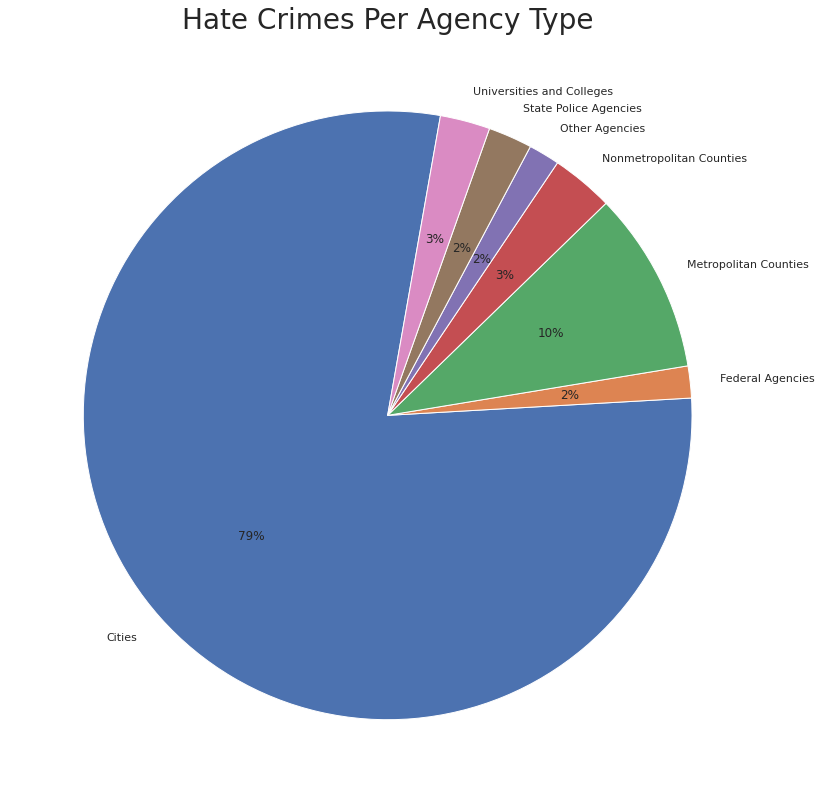

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
plt.subplot(1,2,2)
plt.pie(hc_agency['Annual Hate crime'],
        labels=hc_agency['Agency Type'],
        startangle=80, autopct='%1.0f%%')
plt.title('Hate Crimes Per Agency Type', fontsize=28)
plt.rcParams['font.size']=20
plt.show()

### 3.2.1 Breakdown Per City




In these next lines of code, we will be looking at the breakdown of hate crimes in cities to answer: **which city has the highest hate crime incidents?**

We will start by filtering our dataframe to only cities.

In [ ]:
#filter data to only include Cities
city = hc_clean[hc_clean["Agency Type"]== "Cities"]
city = city.drop(columns=["Population"])
city

,State,Agency Type,Agency,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nidentity,Annual Hate crime
0,Alaska,Cities,Anchorage,4.0,0.0,2.0,0.0,0.0,0.0,6
1,Alaska,Cities,Fairbanks,1.0,0.0,0.0,0.0,0.0,0.0,1
2,Alaska,Cities,Kotzebue,1.0,0.0,0.0,0.0,0.0,0.0,1
3,Alaska,Cities,North Pole,1.0,0.0,0.0,0.0,0.0,0.0,1
4,Alaska,Cities,Soldotna,0.0,0.0,2.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
2108,Wisconsin,Cities,Wisconsin Rapids,1.0,0.0,0.0,0.0,0.0,0.0,1
2120,Wyoming,Cities,Cody,1.0,0.0,0.0,0.0,0.0,0.0,1
2121,Wyoming,Cities,Evanston,1.0,0.0,0.0,0.0,0.0,0.0,1
2122,Wyoming,Cities,Laramie,0.0,0.0,1.0,0.0,0.0,0.0,1


As we have over 1512 cities, we will be limiting the view to only the top 5 cities with the highest hate crime incidents.

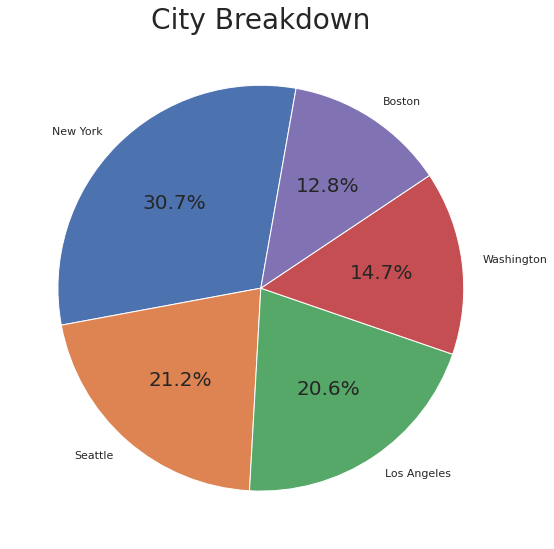

In [ ]:
city1 = city.sort_values('Annual Hate crime', ascending = False)
city1 = city1[:5]
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(1,2,2)
plt.pie(city1['Annual Hate crime'],
        labels=city1['Agency'],
        startangle=80, autopct='%1.1f%%')
plt.title('City Breakdown', fontsize=28)
plt.rcParams['font.size']=20
plt.show()

As you can see, the city with the highest number of hate crime occurences is New York. Although it is one of the most ethnically diverse cities in the US, New York is facing a spike of anti-Semetic, anti-Asian and anti-Black incidents. 

Seattle and Los Angeles are second and third place respectively.

Source: (https://www.cbsnews.com/news/new-york-city-antisemitic-hate-crimes/)

###3.2.2. Breakdown for Other Agencies

We were curious to see the hate crimes in other agencies as well, specifically in state police and other non-federal agencies. 

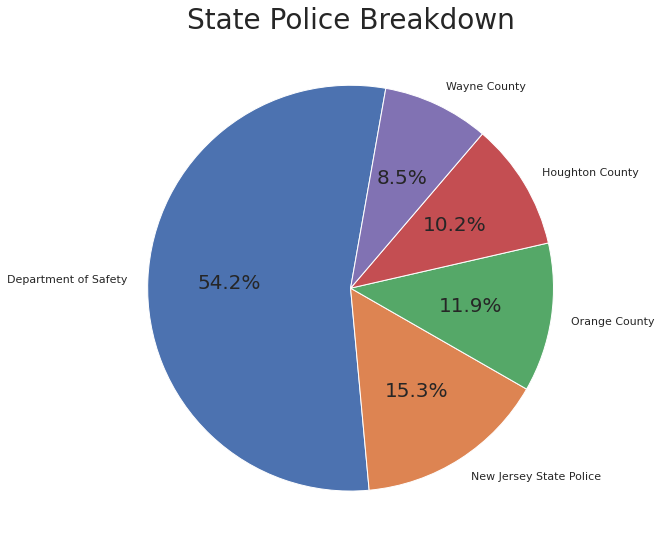

In [ ]:
# Breakdown for Police
pol= hc_clean[hc_clean["Agency Type"]== "State Police Agencies"]
pol = pol.drop(columns=["Population"])

pol1 = pol.sort_values('Annual Hate crime', ascending = False)
pol1 = pol1[:5]
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(1,2,2)
plt.pie(pol1['Annual Hate crime'],
        labels=pol1['Agency'],
        startangle=80, autopct='%1.1f%%')
plt.title('State Police Breakdown', fontsize=28)
plt.rcParams['font.size']=20
plt.show()

The Department of Safety has the highest number of occurences. Throughout our research, we tried to better understand the significance of this agency within this dataset, but were not able to find adequate information to justify why. 

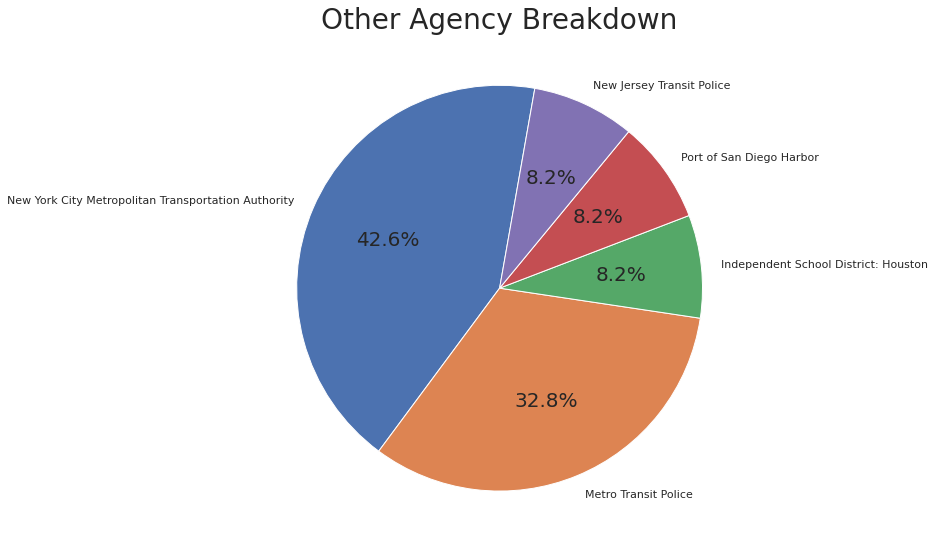

In [ ]:
oth= hc_clean[hc_clean["Agency Type"]== "Other Agencies"]
oth = oth.drop(columns=["Population"])

oth1 = oth.sort_values('Annual Hate crime', ascending = False)
oth1 = oth1[:5]
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(1,2,2)
plt.pie(oth1['Annual Hate crime'],
        labels=oth1['Agency'],
        startangle=80, autopct='%1.1f%%')
plt.title('Other Agency Breakdown', fontsize=28)
plt.rcParams['font.size']=25
plt.show()

The NYC Metropolitan Transportation Authority is the agency under Other that has the highest number of hate crime incidents.

According to an article in Security Magazine, The NYC Metropolitan Transportation Authority (MTA) launched a new advertising campaign to address and **combat the rise in hate crimes on the MTA after an increase of 42% from 2018 to 2019.**

Source: Security Magazine (https://www.securitymagazine.com/articles/91637-mta-unveils-campaign-to-combat-hate-crimes)

### 3.3.1. Bias Per State
The following graphs highlight the bias motivation for hate crimes by state. 

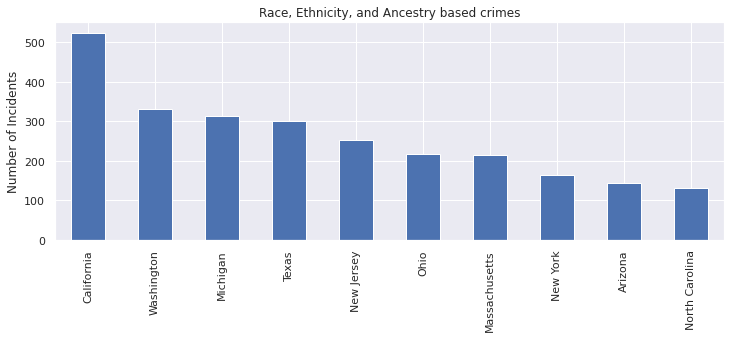

In [ ]:
#Per Race, Ethnicity, Ancestry
total_crime_rea = hc.groupby(by=["State"])["Race/\nEthnicity/\nAncestry"].sum()
total_crime_rea.sort_values(ascending=False)[:10].plot(kind='bar', title='Race, Ethnicity, and Ancestry based crimes', ylabel='Number of Incidents', xlabel='', figsize=(12, 4))

In the larger category of bias (Race, Ethnicity, and Ancestry) you see the number of incidents peaking in states with larger populations like California and Texas, but also comparable incidents in mid-sized states like Michigan and New Jersey.

#**3.3 Dashboard (Visualisations Using Tableau)**

##**3.3.1 Heat Map - US Hate Crime rate**

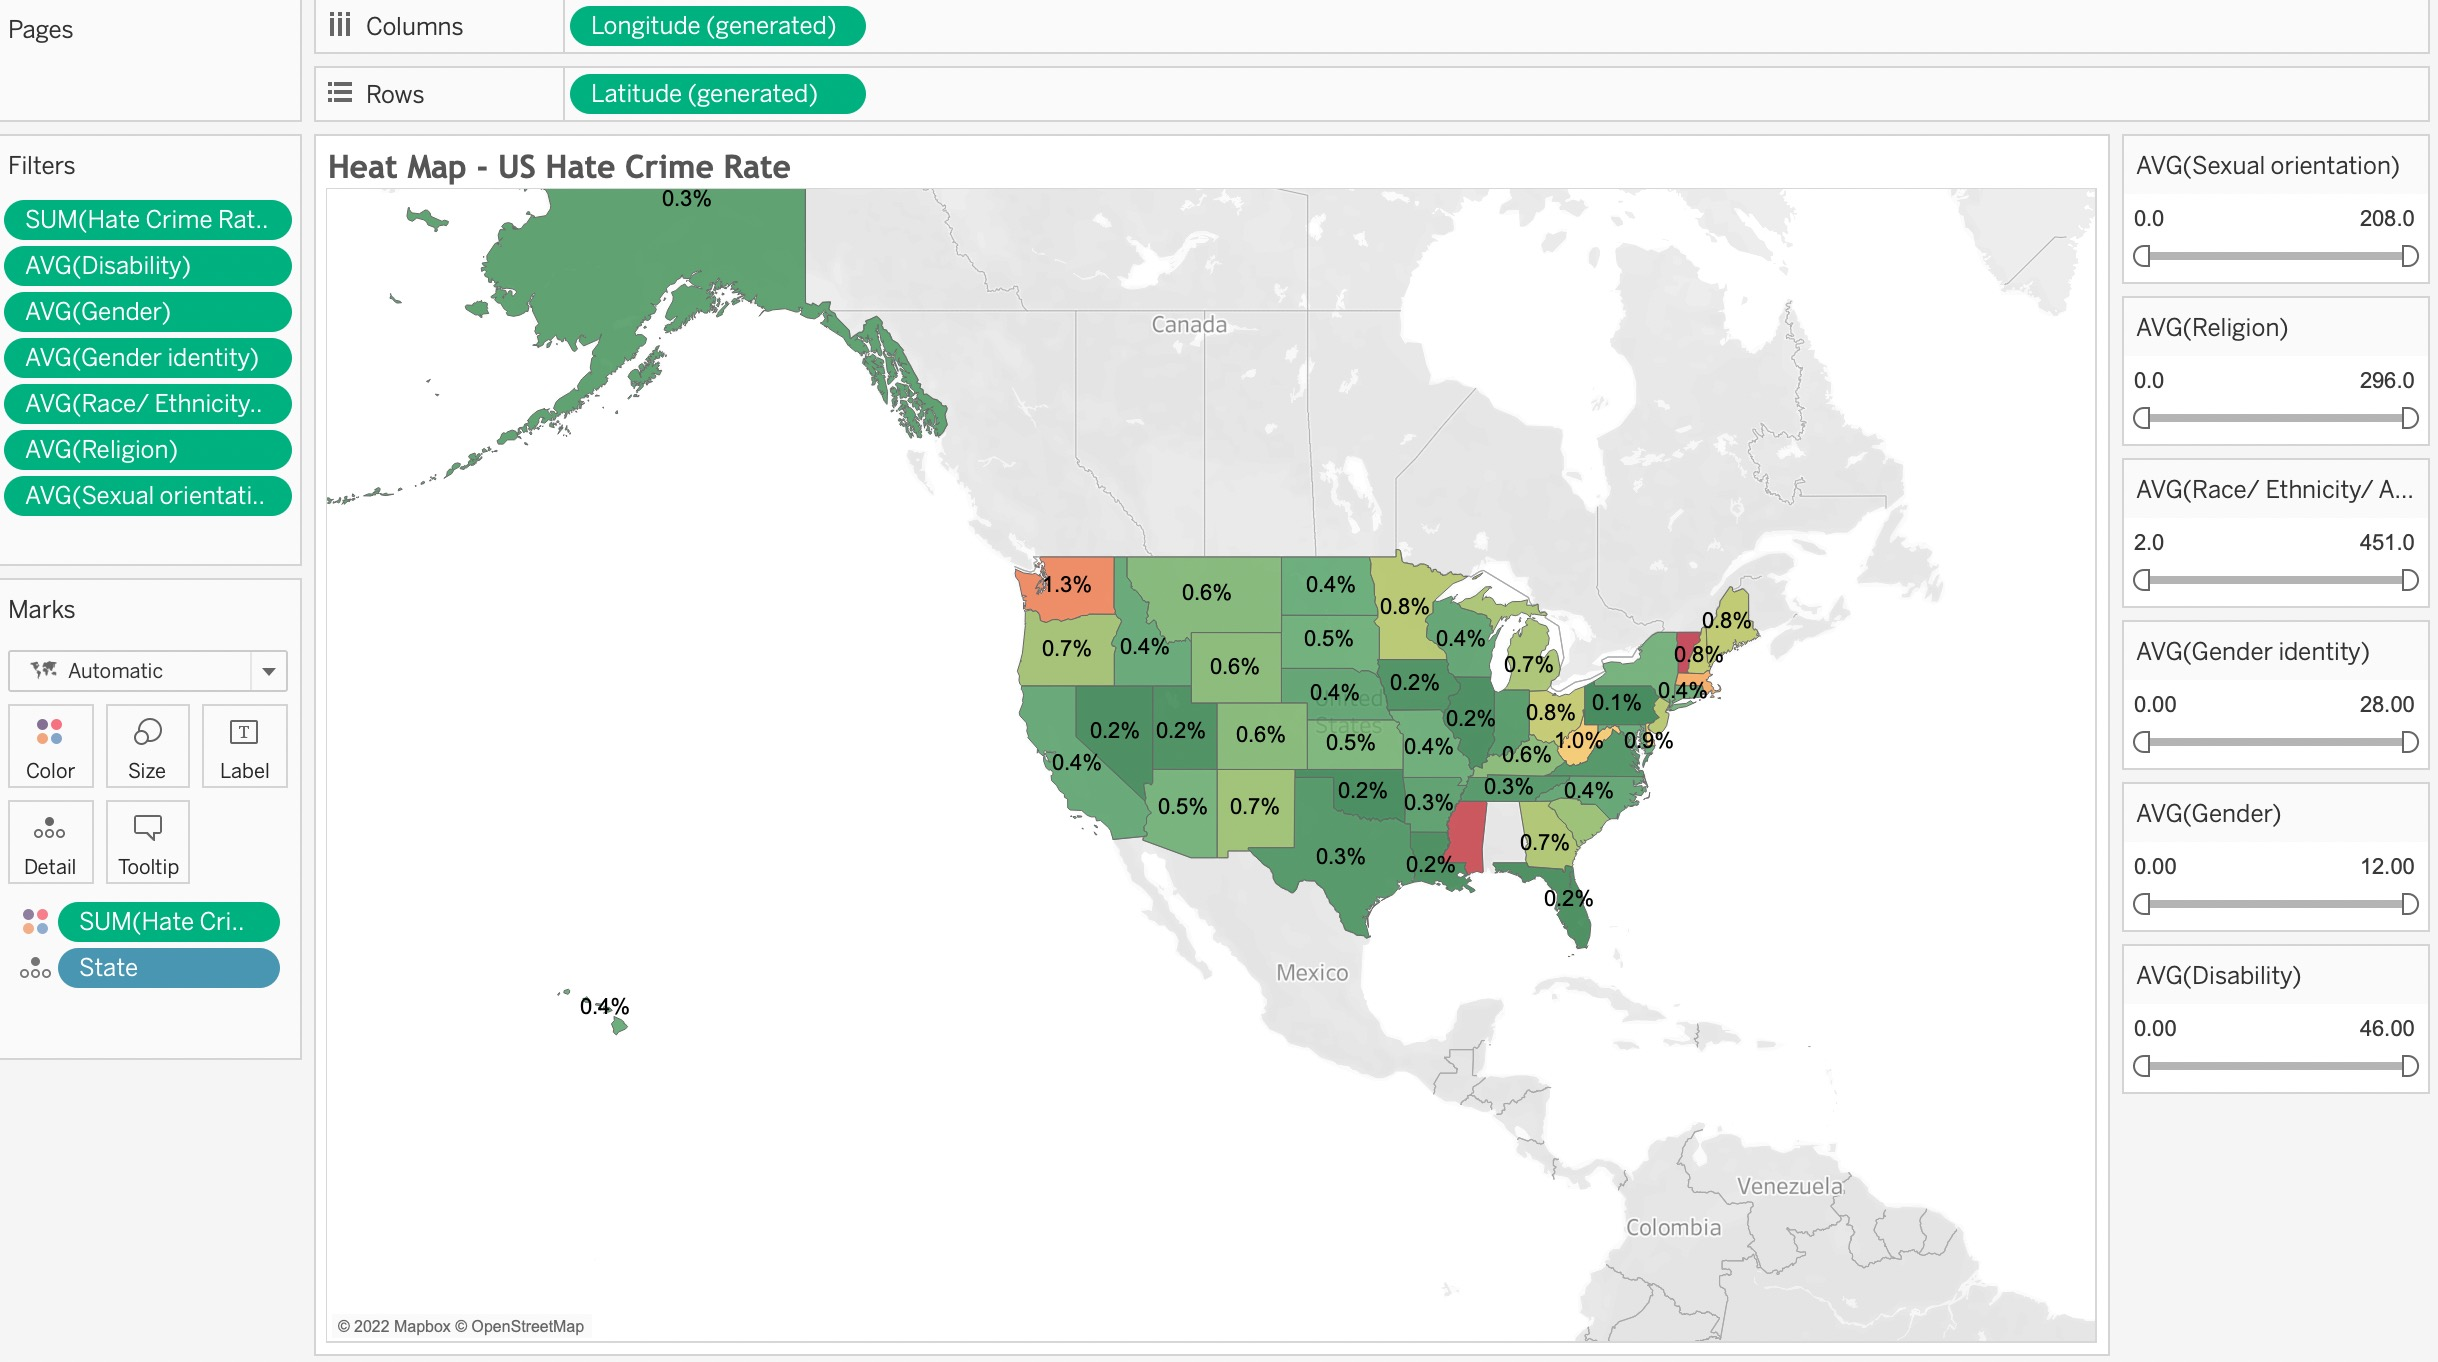

The above heat map shows the **hate crime rate per US State.** We can see that **Mississipi** and **Vermont** have the highest hate crime rate (highlighted in red in the Map above)

##**3.3.2 Hate Crime Rate - All States**

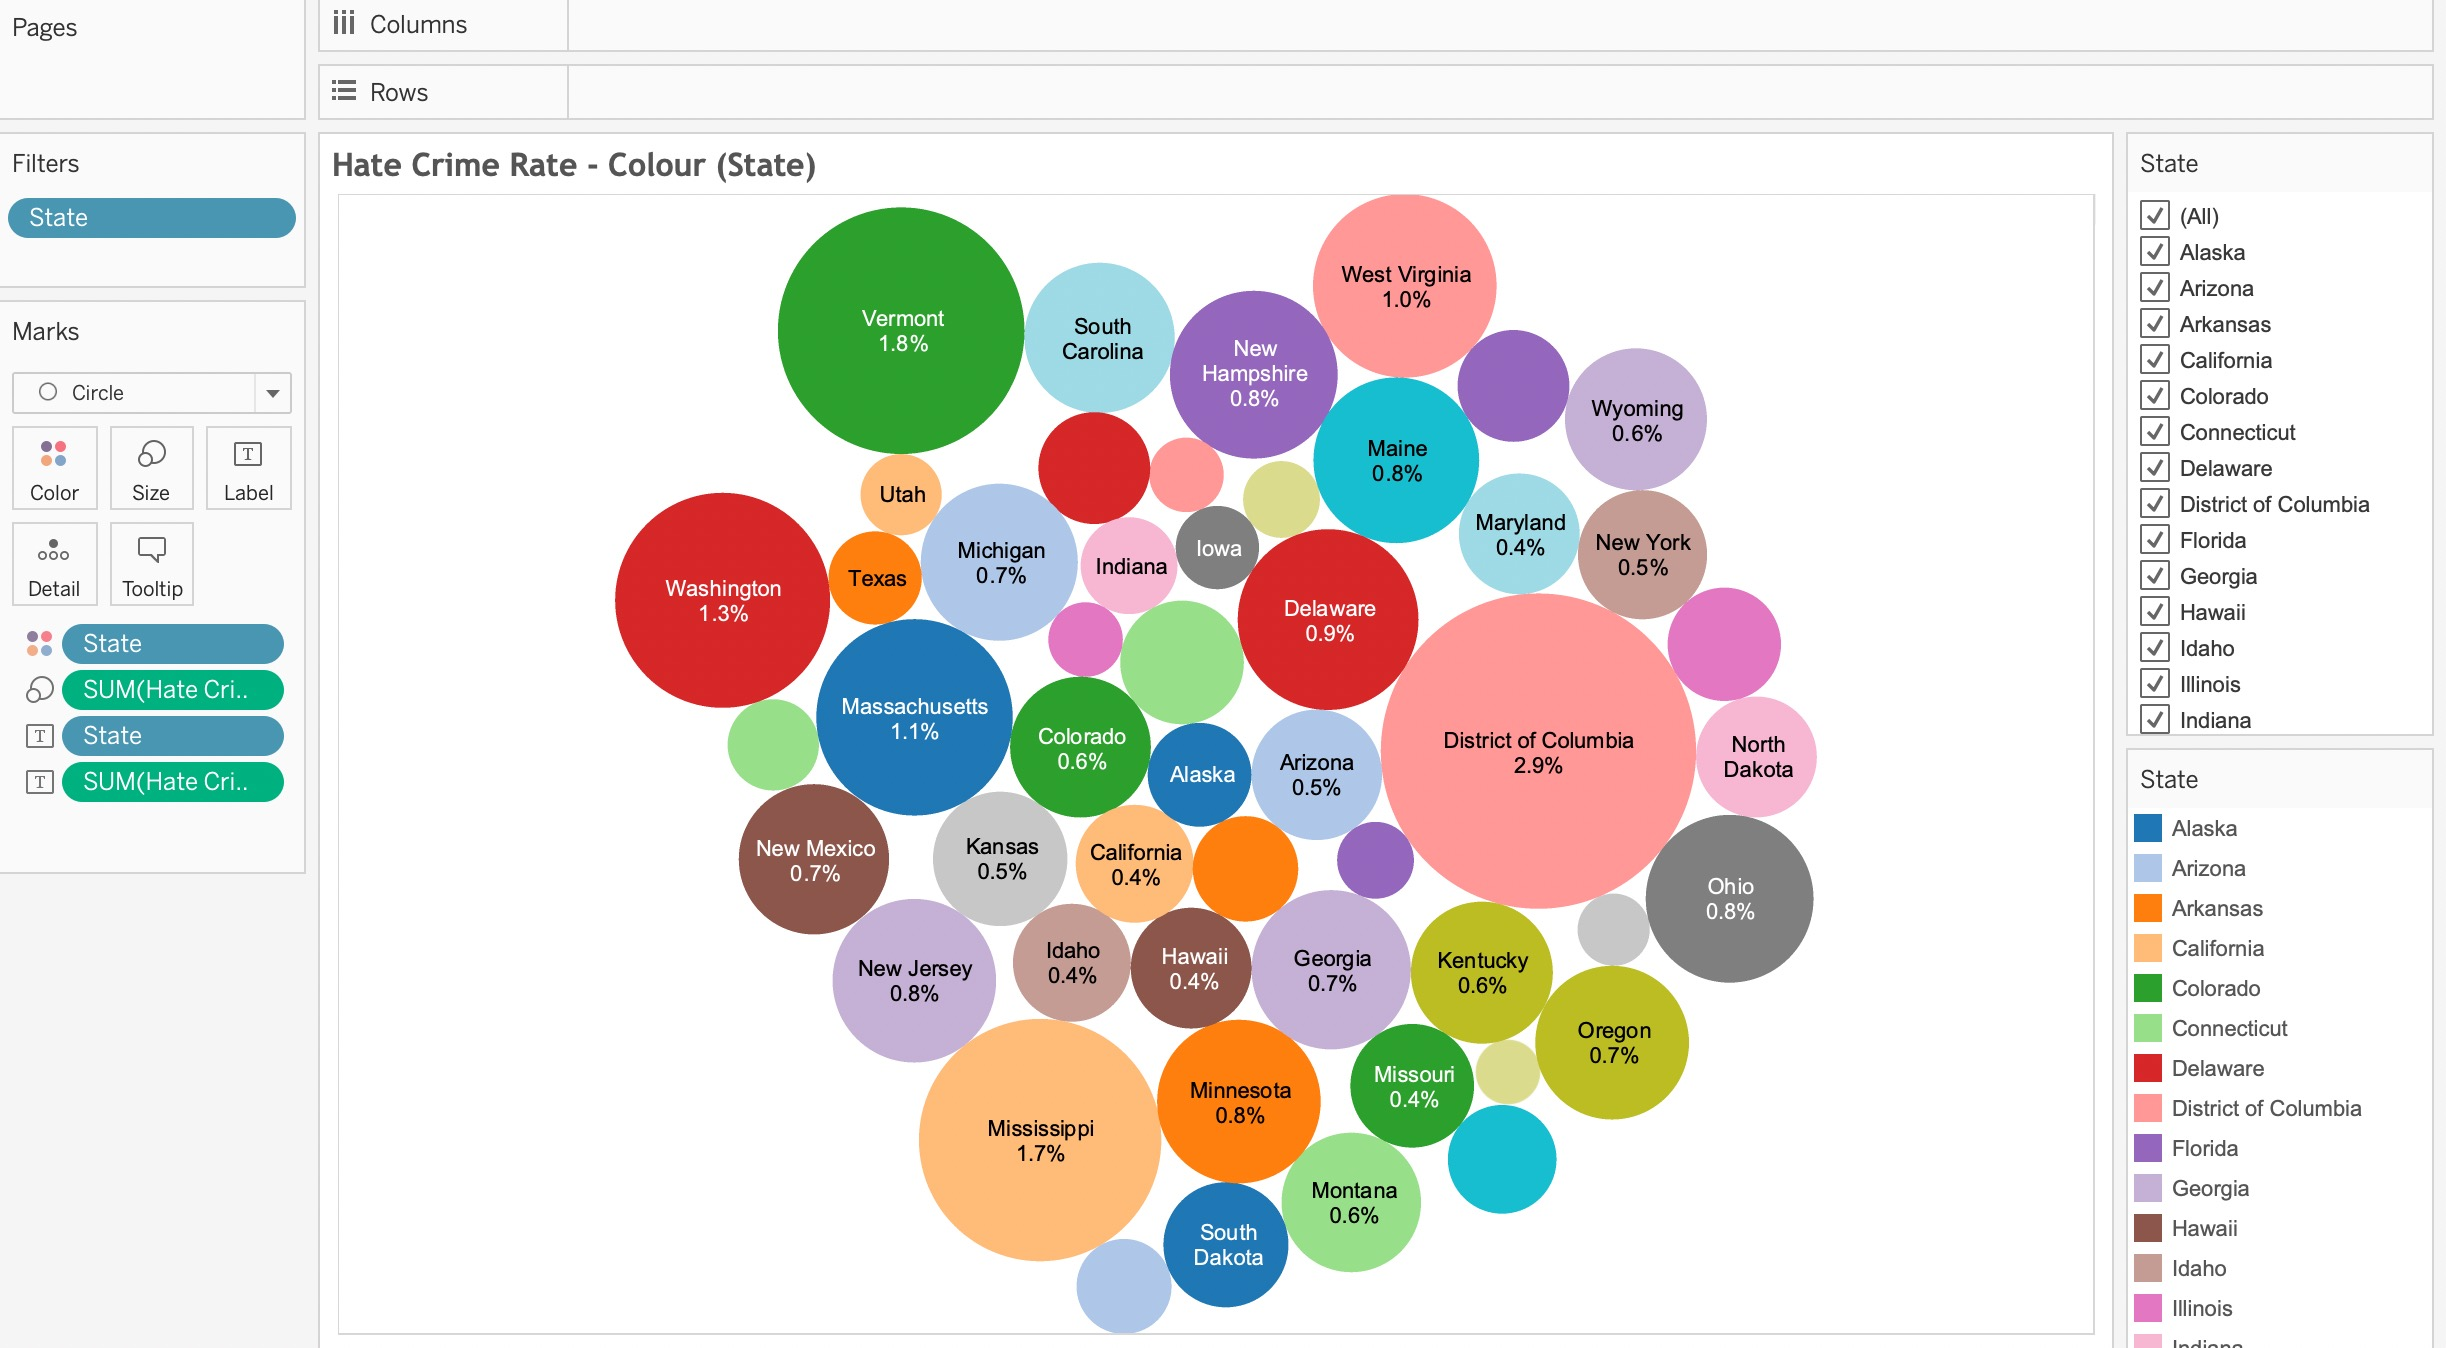

The above Bubble Chart shows the **Hate Crime Rate per State.** (for all the States)
The **Size** of the Bubble is by **Hate Crime Rate**
The **Bubbles** are **colour coded by State**

##**3.3.3 Hate Crime Rate - by Population (Colour) - Top 10 States**

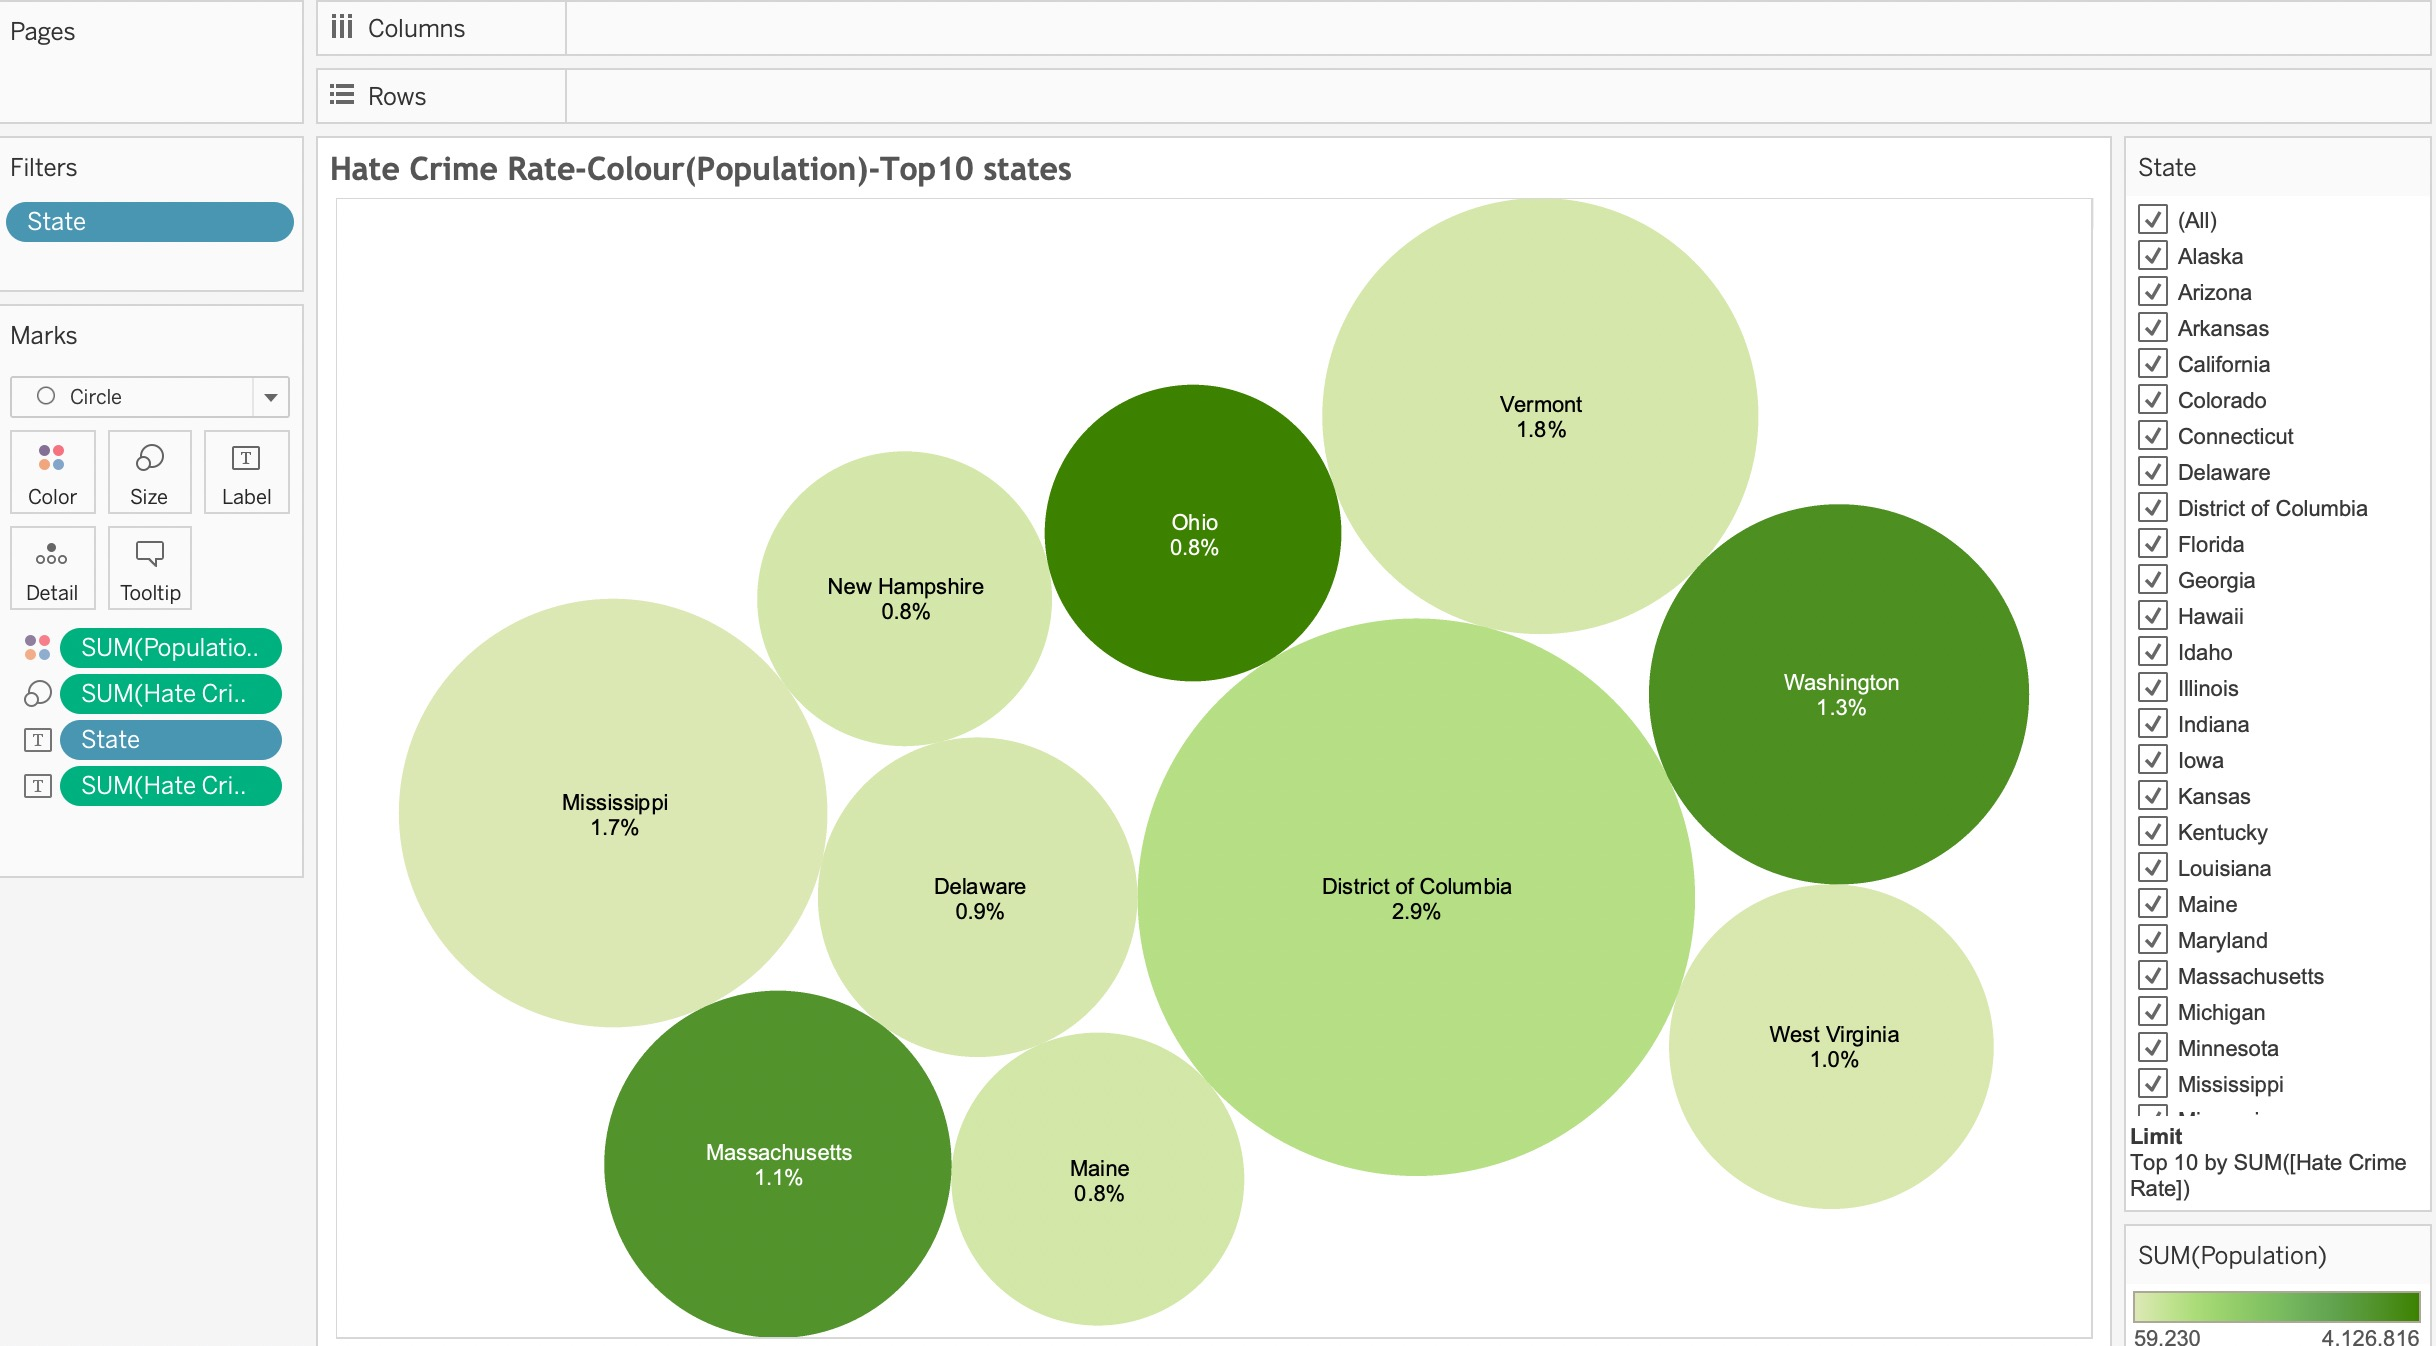

# **4. Conclusion**

Based on what we've gathered from our visualizations throughout our notebook, we've been able to better disect some of the key factors in why hate crimes peak in certain states, as well as agencies. 

The strongest correlation we were able to identify was between sexual orientation and race/ethnicity/ancestry. In order to further analyze, we aggregated the data based on bias motivation, as well as the state it occured in. In conjunction with outside research, we were able to better understand what outside factors effect hate crime rates across the United States. 


Ideally, to continue our data collection, it would be ideal to analyze this data year-over-year, but 2019 provided a great baseline for further analysis. 

